# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**Team 9**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [2]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Libraries for data preparation and model building
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
import math
from statsmodels.graphics.correlation import plot_corr
import statsmodels.formula.api as sm
# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = ###

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [9]:
import os

cwd = os.getcwd()  # Get the current working directory (cwd)
files = os.listdir(cwd)  # Get all the files in that directory
print("Files in %r: %s" % (cwd, files))

Files in 'C:\\Users\\Rami-Chrisie\\Documents\\EXPLORE\\Machine Learning\\Predict\\Advanced-Regression-Starter-Data': ['.DS_Store', '.ipynb_checkpoints', 'df_test.csv', 'df_train.csv', 'starter-notebook.ipynb']


In [41]:
df = pd.read_csv('df_train.csv', index_col=0) # load the data

In [42]:
#overview dataset
df.head()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [43]:
#Getting info about the dataframe e.g datatype,number of columns, missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8763 entries, 0 to 8762
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  8763 non-null   object 
 1   Madrid_wind_speed     8763 non-null   float64
 2   Valencia_wind_deg     8763 non-null   object 
 3   Bilbao_rain_1h        8763 non-null   float64
 4   Valencia_wind_speed   8763 non-null   float64
 5   Seville_humidity      8763 non-null   float64
 6   Madrid_humidity       8763 non-null   float64
 7   Bilbao_clouds_all     8763 non-null   float64
 8   Bilbao_wind_speed     8763 non-null   float64
 9   Seville_clouds_all    8763 non-null   float64
 10  Bilbao_wind_deg       8763 non-null   float64
 11  Barcelona_wind_speed  8763 non-null   float64
 12  Barcelona_wind_deg    8763 non-null   float64
 13  Madrid_clouds_all     8763 non-null   float64
 14  Seville_wind_speed    8763 non-null   float64
 15  Barcelona_rain_1h    

###### The dataset has 49 columns with 8763 entries. Column "Valencia_pressure " is the only one with missing values
All the columns are numerical except Valencia_snow_3h

In [44]:
#Calculating the number of missing values
df.isnull().sum()

time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather_id          0
Seville_temp  

In [45]:
#Calculating the percentage of missing values in each column
pd.DataFrame(data={'% of Missing Values':round(df.isna().sum()/df.isna().count()*100,2)})

,% of Missing Values
time,0.0
Madrid_wind_speed,0.0
Valencia_wind_deg,0.0
Bilbao_rain_1h,0.0
Valencia_wind_speed,0.0
Seville_humidity,0.0
Madrid_humidity,0.0
Bilbao_clouds_all,0.0
Bilbao_wind_speed,0.0
Seville_clouds_all,0.0


In [46]:
df.describe(include='object').T

,count,unique,top,freq
time,8763,8763,2015-01-06 09:00:00,1
Valencia_wind_deg,8763,10,level_1,1072
Seville_pressure,8763,25,sp13,500


###### We can create dummy variables for the categorical features but wind degree and atmospheric pressure are supposed to be numeric

In [47]:
df[['Madrid_wind_speed','Madrid_humidity','Madrid_clouds_all','Madrid_rain_1h','Madrid_weather_id','Madrid_pressure','Madrid_temp_max','Madrid_temp','Madrid_temp_min']]

,Madrid_wind_speed,Madrid_humidity,Madrid_clouds_all,Madrid_rain_1h,Madrid_weather_id,Madrid_pressure,Madrid_temp_max,Madrid_temp,Madrid_temp_min
0,0.666667,64.000000,0.000000,0.0,800.000000,971.333333,265.938000,265.938000,265.938000
1,0.333333,64.666667,0.000000,0.0,800.000000,972.666667,266.386667,266.386667,266.386667
2,1.000000,64.333333,0.000000,0.0,800.000000,974.000000,272.708667,272.708667,272.708667
3,1.000000,56.333333,0.000000,0.0,800.000000,994.666667,281.895219,281.895219,281.895219
4,1.000000,57.000000,0.000000,0.0,800.000000,1035.333333,280.678437,280.678437,280.678437
...,...,...,...,...,...,...,...,...,...
8758,1.000000,95.666667,45.000000,0.0,727.666667,1024.000000,280.816667,279.686667,278.483333
8759,5.000000,85.000000,85.000000,0.0,762.000000,1023.666667,283.483333,282.400000,280.150000
8760,6.333333,71.000000,85.000000,0.1,702.333333,1021.666667,285.150000,283.956667,281.150000
8761,7.333333,79.000000,56.666667,0.3,500.000000,1023.000000,283.483333,282.666667,280.816667


In [48]:
df[['Valencia_wind_deg','Valencia_wind_speed','Valencia_snow_3h','Valencia_pressure','Valencia_temp_max','Valencia_temp','Valencia_temp_min','Valencia_humidity']]

,Valencia_wind_deg,Valencia_wind_speed,Valencia_snow_3h,Valencia_pressure,Valencia_temp_max,Valencia_temp,Valencia_temp_min,Valencia_humidity
0,level_5,0.666667,0.0,1002.666667,269.888000,269.888000,269.888000,75.666667
1,level_10,1.666667,0.0,1004.333333,271.728333,271.728333,271.728333,71.000000
2,level_9,1.000000,0.0,1005.333333,278.008667,278.008667,278.008667,65.666667
3,level_8,1.000000,0.0,1009.000000,284.899552,284.899552,284.899552,54.000000
4,level_7,1.000000,0.0,NaN,283.015115,283.015115,283.015115,58.333333
...,...,...,...,...,...,...,...,...
8758,level_6,2.666667,0.0,NaN,282.483333,282.483333,282.483333,71.333333
8759,level_6,2.000000,0.0,1021.000000,291.816667,291.816667,291.816667,40.333333
8760,level_9,7.333333,0.0,1009.666667,290.706333,290.706333,290.706333,44.666667
8761,level_8,7.333333,0.0,1020.000000,290.483333,290.483333,290.483333,45.000000


In [49]:
df[['Bilbao_rain_1h','Bilbao_clouds_all','Bilbao_wind_speed','Bilbao_wind_deg','Bilbao_snow_3h','Bilbao_pressure','Bilbao_weather_id','Bilbao_temp_min','Bilbao_temp','Bilbao_temp_max']]

,Bilbao_rain_1h,Bilbao_clouds_all,Bilbao_wind_speed,Bilbao_wind_deg,Bilbao_snow_3h,Bilbao_pressure,Bilbao_weather_id,Bilbao_temp_min,Bilbao_temp,Bilbao_temp_max
0,0.0,0.000000,1.000000,223.333333,0.0,1035.000000,800.000000,269.338615,269.338615,269.338615
1,0.0,0.000000,1.000000,221.000000,0.0,1035.666667,800.000000,270.376000,270.376000,270.376000
2,0.0,0.000000,1.000000,214.333333,0.0,1036.000000,800.000000,275.027229,275.027229,275.027229
3,0.0,0.000000,1.000000,199.666667,0.0,1036.000000,800.000000,281.135063,281.135063,281.135063
4,0.0,2.000000,0.333333,185.000000,0.0,1035.333333,800.000000,282.252063,282.252063,282.252063
...,...,...,...,...,...,...,...,...,...,...
8758,0.0,56.666667,4.333333,226.666667,0.0,1017.666667,802.333333,285.150000,287.573333,290.150000
8759,0.0,26.666667,8.000000,220.000000,0.0,1015.333333,801.333333,286.483333,288.616667,291.150000
8760,0.4,63.333333,8.333333,283.333333,0.0,1017.333333,601.000000,283.816667,285.330000,286.816667
8761,0.2,63.333333,2.666667,220.000000,0.0,1020.333333,634.166667,278.816667,281.410000,284.150000


In [50]:
df[['Seville_humidity','Seville_clouds_all','Seville_wind_speed','Seville_pressure','Seville_rain_1h','Seville_rain_3h','Seville_weather_id','Seville_temp_max','Seville_temp','Seville_temp_min']]

,Seville_humidity,Seville_clouds_all,Seville_wind_speed,Seville_pressure,Seville_rain_1h,Seville_rain_3h,Seville_weather_id,Seville_temp_max,Seville_temp,Seville_temp_min
0,74.333333,0.000000,3.333333,sp25,0.0,0.0,800.000000,274.254667,274.254667,274.254667
1,78.333333,0.000000,3.333333,sp25,0.0,0.0,800.000000,274.945000,274.945000,274.945000
2,71.333333,0.000000,2.666667,sp25,0.0,0.0,800.000000,278.792000,278.792000,278.792000
3,65.333333,0.000000,4.000000,sp25,0.0,0.0,800.000000,285.394000,285.394000,285.394000
4,59.000000,0.000000,3.000000,sp25,0.0,0.0,800.000000,285.513719,285.513719,285.513719
...,...,...,...,...,...,...,...,...,...,...
8758,89.000000,80.000000,1.000000,sp23,0.0,0.0,769.333333,285.483333,285.076667,284.816667
8759,82.000000,75.000000,1.666667,sp23,0.0,0.0,803.000000,288.483333,287.673333,287.150000
8760,67.666667,33.333333,3.666667,sp22,0.0,0.0,801.666667,291.483333,290.070000,289.150000
8761,67.666667,51.666667,4.333333,sp23,0.0,0.0,802.333333,291.483333,290.070000,289.150000


In [51]:
df[['Barcelona_wind_speed','Barcelona_wind_deg','Barcelona_rain_1h','Barcelona_rain_3h','Barcelona_pressure','Barcelona_weather_id','Barcelona_temp_max','Barcelona_temp','Barcelona_temp_min']]

,Barcelona_wind_speed,Barcelona_wind_deg,Barcelona_rain_1h,Barcelona_rain_3h,Barcelona_pressure,Barcelona_weather_id,Barcelona_temp_max,Barcelona_temp,Barcelona_temp_min
0,6.333333,42.666667,0.0,0.0,1036.333333,800.0,281.013000,281.013000,281.013000
1,4.000000,139.000000,0.0,0.0,1037.333333,800.0,280.561667,280.561667,280.561667
2,2.000000,326.000000,0.0,0.0,1038.000000,800.0,281.583667,281.583667,281.583667
3,2.333333,273.000000,0.0,0.0,1037.000000,800.0,283.434104,283.434104,283.434104
4,4.333333,260.000000,0.0,0.0,1035.000000,800.0,284.213167,284.213167,284.213167
...,...,...,...,...,...,...,...,...,...
8758,1.666667,83.666667,0.0,0.0,1021.000000,801.0,282.150000,281.276667,280.483333
8759,3.000000,213.333333,0.0,0.0,1019.000000,801.0,287.816667,287.483333,287.150000
8760,5.333333,256.666667,0.0,0.0,1015.666667,801.0,290.483333,289.816667,289.150000
8761,5.333333,250.000000,0.0,0.0,1015.000000,800.0,288.150000,287.523333,286.816667


In [52]:
#Check the number of unique values in each column
df.nunique()

time                    8763
Madrid_wind_speed         38
Valencia_wind_deg         10
Bilbao_rain_1h            20
Valencia_wind_speed       58
Seville_humidity         274
Madrid_humidity          280
Bilbao_clouds_all        277
Bilbao_wind_speed         39
Seville_clouds_all       246
Bilbao_wind_deg         1042
Barcelona_wind_speed      39
Barcelona_wind_deg       974
Madrid_clouds_all        250
Seville_wind_speed        38
Barcelona_rain_1h         31
Seville_pressure          25
Seville_rain_1h           17
Bilbao_snow_3h            83
Barcelona_pressure       189
Seville_rain_3h           50
Madrid_rain_1h            19
Barcelona_rain_3h         77
Valencia_snow_3h           6
Madrid_weather_id        289
Barcelona_weather_id     269
Bilbao_pressure          205
Seville_weather_id       301
Valencia_pressure        143
Seville_temp_max        3294
Madrid_pressure          298
Valencia_temp_max       3387
Valencia_temp           4531
Bilbao_weather_id        356
Seville_temp  

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [57]:
# look at data statistics
df.describe()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,2.425729,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,2.870497,...,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,1.850371,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,1.792197,...,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,0.000000,...,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,1.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,1.666667,...,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,2.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,2.666667,...,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,3.333333,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,4.000000,...,296.816667,294.909000,289.816667,291.034167,292.966667,292.483333,297.150000,295.154667,293.884500,14498.166667
max,13.000000,3.000000,52.000000,100.000000,100.000000,100.000000,12.666667,97.333333,359.333333,12.666667,...,314.483333,307.316667,309.816667,310.710000,304.816667,317.966667,314.816667,313.133333,310.383333,31904.000000


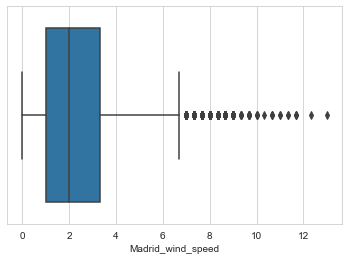

In [63]:
sns.boxplot(x='Madrid_wind_speed', data=df);

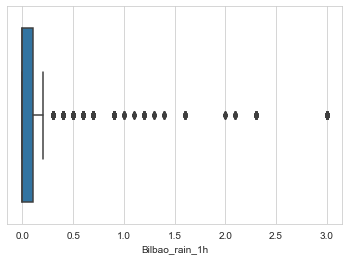

In [64]:
sns.boxplot(x='Bilbao_rain_1h', data=df);

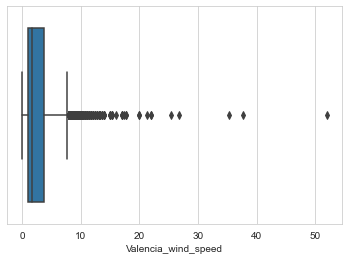

In [70]:
sns.boxplot(x='Valencia_wind_speed', data=df);

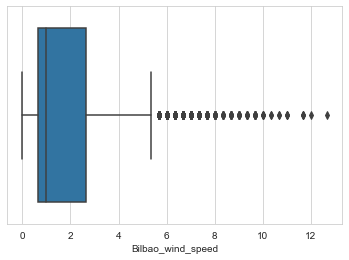

In [72]:
sns.boxplot(x='Bilbao_wind_speed', data=df);

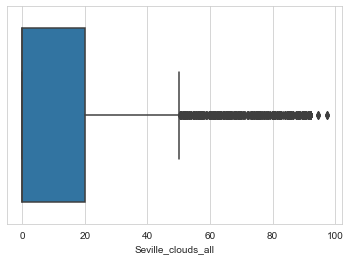

In [74]:
sns.boxplot(x='Seville_clouds_all', data=df);

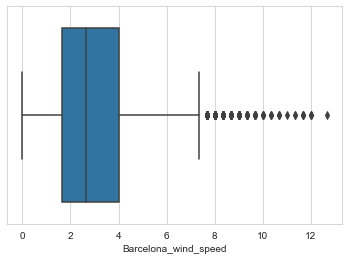

In [75]:
sns.boxplot(x='Barcelona_wind_speed', data=df);

In [58]:
#Making a list of all catrgorical variables 
cat_col=['time','Valencia_wind_deg','Seville_pressure']

#Printing number of count of each unique value in each column
for column in cat_col:
    print(df[column].value_counts())
    print('-'*50)

2015-01-06 09:00:00    1
2015-12-22 15:00:00    1
2015-04-20 18:00:00    1
2015-05-16 12:00:00    1
2016-09-17 06:00:00    1
                      ..
2017-03-26 06:00:00    1
2017-11-17 00:00:00    1
2017-08-05 21:00:00    1
2016-02-25 18:00:00    1
2017-01-16 12:00:00    1
Name: time, Length: 8763, dtype: int64
--------------------------------------------------
level_1     1072
level_5      915
level_4      914
level_3      890
level_7      882
level_6      881
level_2      874
level_10     839
level_8      798
level_9      698
Name: Valencia_wind_deg, dtype: int64
--------------------------------------------------
sp13    500
sp10    460
sp8     418
sp6     411
sp25    410
sp21    408
sp24    405
sp4     404
sp17    401
sp18    395
sp22    392
sp16    392
sp12    378
sp5     372
sp19    357
sp20    340
sp23    339
sp15    326
sp2     325
sp3     309
sp1     270
sp14    255
sp9     183
sp7     174
sp11    139
Name: Seville_pressure, dtype: int64
---------------------------------------

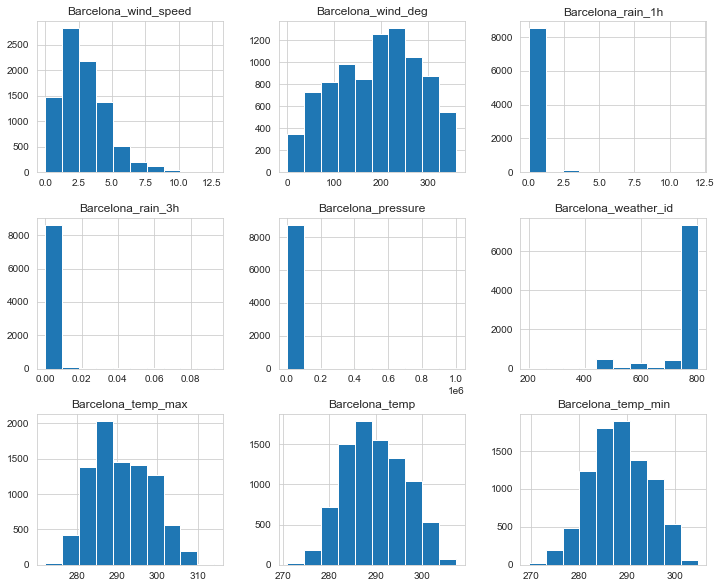

In [59]:
# plot relevant feature interactions
#Creating list of features for Barcelona
feature_1 = ['Barcelona_wind_speed','Barcelona_wind_deg','Barcelona_rain_1h','Barcelona_rain_3h','Barcelona_pressure','Barcelona_weather_id','Barcelona_temp_max','Barcelona_temp','Barcelona_temp_min']
df[feature_1].hist(figsize=(12,10));

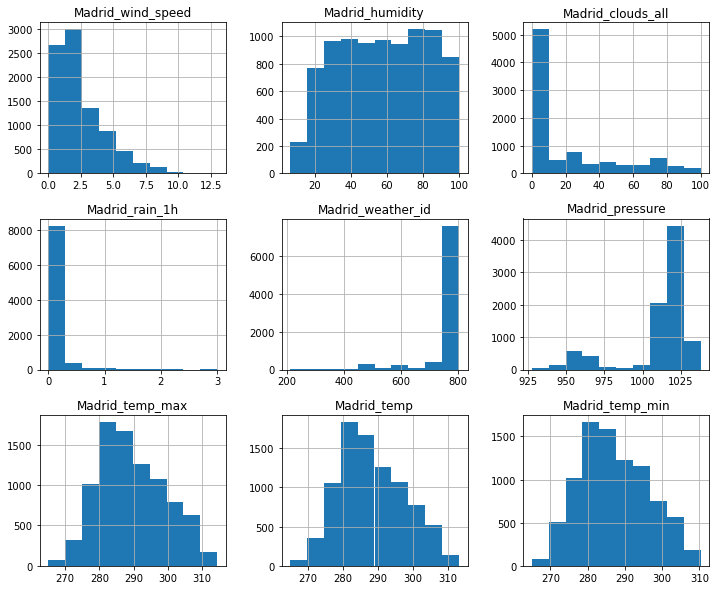

In [14]:
#Creating a list for Madrid features
features_2 = ['Madrid_wind_speed','Madrid_humidity','Madrid_clouds_all','Madrid_rain_1h','Madrid_weather_id','Madrid_pressure','Madrid_temp_max','Madrid_temp','Madrid_temp_min']
df[features_2].hist(figsize=(12,10));

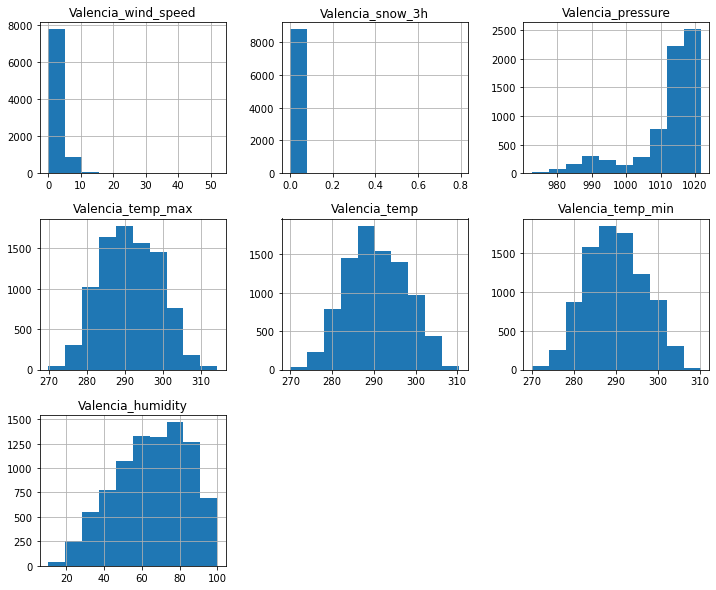

In [16]:
#Creating a list for Valencia features
features_3= ['Valencia_wind_deg','Valencia_wind_speed','Valencia_snow_3h','Valencia_pressure','Valencia_temp_max','Valencia_temp','Valencia_temp_min','Valencia_humidity']
df[features_3].hist(figsize=(12,10));

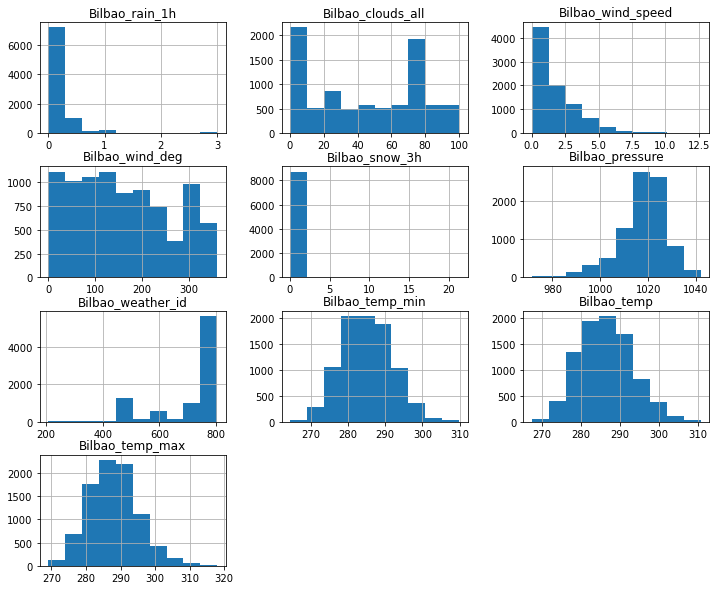

In [17]:
#Creating a list of features for Bilbao
features_4 = ['Bilbao_rain_1h','Bilbao_clouds_all','Bilbao_wind_speed','Bilbao_wind_deg','Bilbao_snow_3h','Bilbao_pressure','Bilbao_weather_id','Bilbao_temp_min','Bilbao_temp','Bilbao_temp_max']
df[features_4].hist(figsize=(12,10));

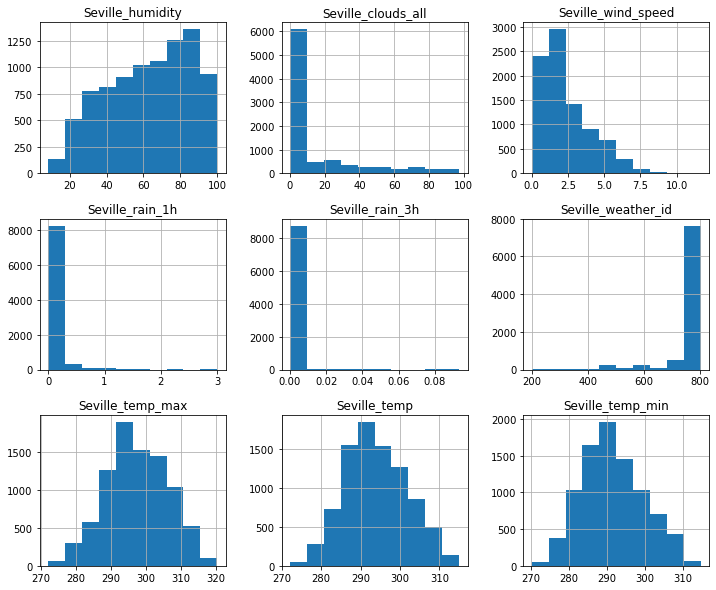

In [18]:
#Creating a list for Seville features
features_5= ['Seville_humidity','Seville_clouds_all','Seville_wind_speed','Seville_pressure','Seville_rain_1h','Seville_rain_3h','Seville_weather_id','Seville_temp_max','Seville_temp','Seville_temp_min']
df[features_5].hist(figsize=(12,10));

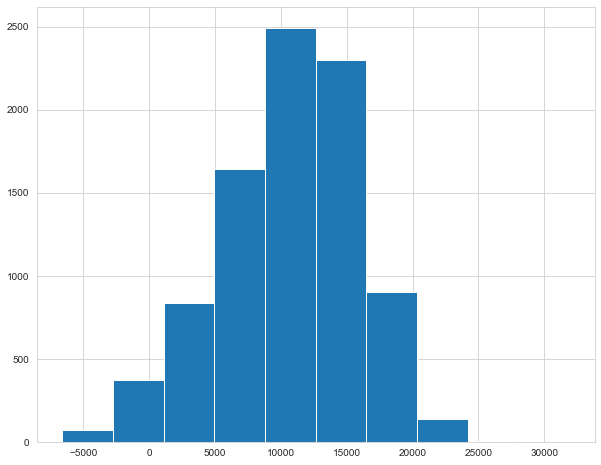

In [62]:
df['load_shortfall_3h'].hist(figsize=(10,8));

In [19]:
# evaluate correlation
df.corr()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
Unnamed: 0,1.000000,-0.109288,-0.249633,-0.090161,-0.079025,-0.103359,-0.068123,0.049197,-0.140583,-0.155738,...,0.093378,0.068078,0.028698,0.081799,0.103436,0.146216,0.037487,0.088439,0.085197,0.192612
Madrid_wind_speed,-0.109288,1.000000,0.259719,0.513092,-0.117892,-0.137092,0.244001,0.377854,0.191251,0.270950,...,0.091464,0.080133,0.077330,0.060467,0.089992,0.042114,0.110278,0.109572,0.098138,-0.150981
Bilbao_rain_1h,-0.249633,0.259719,1.000000,0.265864,0.069878,0.106765,0.370733,0.085398,0.081131,0.279350,...,-0.148397,-0.138901,-0.141269,-0.182494,-0.106593,-0.219871,-0.120575,-0.135927,-0.116431,-0.152510
Valencia_wind_speed,-0.090161,0.513092,0.265864,1.000000,-0.075227,-0.019388,0.210524,0.386478,0.163675,0.248643,...,-0.021970,-0.021456,-0.010166,-0.022676,0.001413,-0.033271,0.003618,-0.011982,-0.019742,-0.142791
Seville_humidity,-0.079025,-0.117892,0.069878,-0.075227,1.000000,0.799831,0.061680,-0.088180,0.399436,-0.087246,...,-0.708937,-0.617797,-0.605493,-0.604733,-0.595065,-0.583718,-0.784850,-0.717171,-0.688664,-0.167290
Madrid_humidity,-0.103359,-0.137092,0.106765,-0.019388,0.799831,1.000000,0.041878,-0.016808,0.374112,-0.069570,...,-0.803260,-0.684867,-0.635760,-0.634825,-0.636777,-0.611395,-0.769591,-0.802605,-0.759633,-0.150536
Bilbao_clouds_all,-0.068123,0.244001,0.370733,0.210524,0.061680,0.041878,1.000000,0.031915,0.046737,0.280154,...,-0.048491,-0.023171,-0.067731,-0.114118,-0.010804,-0.158014,-0.077417,-0.046686,-0.046189,-0.127293
Bilbao_wind_speed,0.049197,0.377854,0.085398,0.386478,-0.088180,-0.016808,0.031915,1.000000,0.127344,0.417534,...,0.025367,0.018967,0.107302,0.142435,0.023711,0.177123,0.055077,0.031245,0.021425,-0.081602
Seville_clouds_all,-0.140583,0.191251,0.081131,0.163675,0.399436,0.374112,0.046737,0.127344,1.000000,0.053482,...,-0.238895,-0.186463,-0.134249,-0.152393,-0.153412,-0.165567,-0.200453,-0.227094,-0.212758,-0.091804
Bilbao_wind_deg,-0.155738,0.270950,0.279350,0.248643,-0.087246,-0.069570,0.280154,0.417534,0.053482,1.000000,...,0.028535,0.068701,0.095047,0.065396,0.086482,0.031187,0.062663,0.044102,0.048397,-0.120800


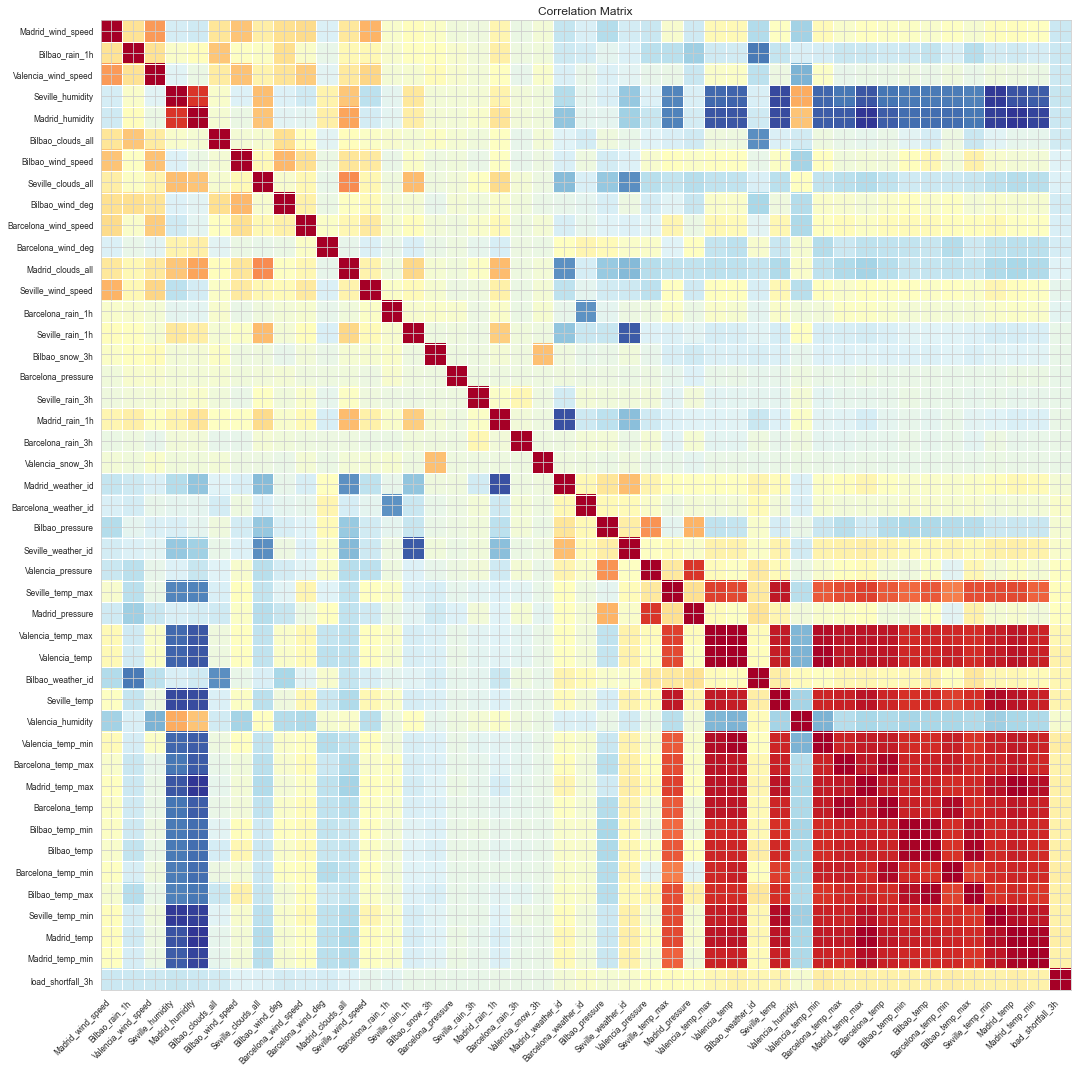

In [37]:
from statsmodels.graphics.correlation import plot_corr

fig = plt.figure(figsize=(15,15));
ax = fig.add_subplot(111);
plot_corr(df.corr(), xnames = df.corr().columns, ax = ax);

It looks like temperatures in the different cities are highly correlated!!!
There is some correlation between clouds and humidity

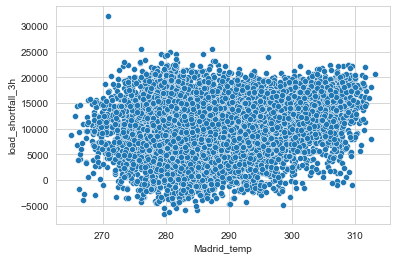

In [80]:
sns.scatterplot(x='Madrid_temp',y='load_shortfall_3h', data=df);

In [ ]:
# have a look at feature distributions

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [ ]:
# remove missing values/ features

In [ ]:
# create new features

In [ ]:
# engineer existing features

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [ ]:
# split data

In [ ]:
# create targets and features dataset

In [ ]:
# create one or more ML models

In [ ]:
# evaluate one or more ML models

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Compare model performance

In [ ]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic